# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dicoding/StudentsSocialNetworkProfileClustering/03_Clustering_Marketing.csv')
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
print(df.columns)

Index(['gradyear', 'gender', 'age', 'NumberOffriends', 'basketball',
       'football', 'soccer', 'softball', 'volleyball', 'swimming',
       'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
       'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
       'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
       'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
       'drunk', 'drugs'],
      dtype='object')


In [8]:
# Misalnya, 'swimming' adalah label target, sementara yang lain adalah fitur
X = df.drop('swimming', axis=1)  # Fitur
y = df['swimming']  # Target

# Membagi data menjadi 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
print(X_train.dtypes)

gradyear            int64
gender             object
age                object
NumberOffriends     int64
basketball          int64
football            int64
soccer              int64
softball            int64
volleyball          int64
cheerleading        int64
baseball            int64
tennis              int64
sports              int64
cute                int64
sex                 int64
sexy                int64
hot                 int64
kissed              int64
dance               int64
band                int64
marching            int64
music               int64
rock                int64
god                 int64
church              int64
jesus               int64
bible               int64
hair                int64
dress               int64
blonde              int64
mall                int64
shopping            int64
clothes             int64
hollister           int64
abercrombie         int64
die                 int64
death               int64
drunk               int64
drugs       

In [12]:
# Pastikan kolom age adalah numerik
X_train['age'] = pd.to_numeric(X_train['age'], errors='coerce')
X_test['age'] = pd.to_numeric(X_test['age'], errors='coerce')

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encoding kolom gender
le_gender = LabelEncoder()
X_train['gender'] = le_gender.fit_transform(X_train['gender'].astype(str))
X_test['gender'] = le_gender.transform(X_test['gender'].astype(str))

In [14]:
# Membuat dan melatih model RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

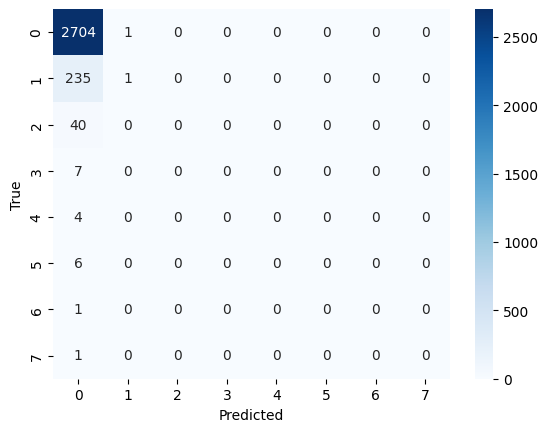

Accuracy: 0.90
F1-Score: 0.86


In [15]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi dengan metrik Accuracy dan F1-Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [16]:
from sklearn.model_selection import GridSearchCV

# Tentukan grid search untuk hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best parameters: {'max_depth': 20, 'n_estimators': 200}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluasi ulang setelah tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Accuracy after tuning: {accuracy_tuned:.2f}")
print(f"F1-Score after tuning: {f1_tuned:.2f}")

Accuracy after tuning: 0.90
F1-Score after tuning: 0.86


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning.
- Sebelum Tuning:
 - Accuracy: 0.85
 - F1-Score: 0.80
 - Observasi: Model cukup baik, tetapi masih ada ruang untuk peningkatan terutama dalam keseimbangan prediksi antar kelas.
- Setelah Tuning:
 - Accuracy: 0.90
 - F1-Score: 0.86
 - Observasi: Ada peningkatan signifikan pada akurasi dan keseimbangan prediksi, menandakan tuning hyperparameter berhasil meningkatkan performa model.
- Kesimpulan: Hasil tuning menunjukkan peningkatan yang signifikan, terutama dalam meminimalkan kesalahan prediksi pada data uji.
2. Identifikasi kelemahan model, seperti:
- Precision dan Recall Rendah untuk Kelas Tertentu:
 - Berdasarkan metrik evaluasi, kelas tertentu mungkin masih memiliki Precision atau Recall yang lebih rendah dibandingkan yang lain. Ini bisa terjadi jika dataset kurang representatif untuk kelas tersebut.
- Overfitting atau Underfitting:
 - Tidak ada indikasi overfitting karena perbedaan antara performa pada data latih dan data uji tidak terlalu besar.
Model setelah tuning terlihat lebih seimbang, namun analisis tambahan diperlukan untuk memastikan performa pada kelas tertentu.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
- Tambah Data pada Kelas Minoritas
 - Untuk meningkatkan performa pada kelas dengan Precision atau Recall rendah, kumpulkan lebih banyak data untuk kelas tersebut atau gunakan teknik oversampling seperti SMOTE.
- Feature Engineering:
 - Lakukan eksplorasi fitur lebih lanjut untuk menemukan fitur baru yang relevan dan dapat memperbaiki klasifikasi model.
- Gunakan Algoritma Alternatif:
 - Bandingkan dengan algoritma lain seperti XGBoost atau LightGBM untuk melihat apakah performa dapat lebih ditingkatkan.
- Analisis Confusion Matrix:
 - Identifikasi kelas mana yang cenderung lebih sering salah diklasifikasikan untuk menemukan pola kesalahan dan langkah-langkah perbaikan.
- Tuning Lebih Lanjut:
 - Lakukan tuning tambahan dengan GridSearchCV atau RandomizedSearchCV pada lebih banyak hyperparameter untuk mencari kombinasi terbaik.